In [1]:
import pandas as pd
from pandas.plotting import table
import requests
import json
from config import key, bkey
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook, ticker, units
import datetime
import functools
import re

## US Census Data API

In [2]:
census = pd.read_html('https://api.census.gov/data.html')[0]

In [3]:
list(census["Title"])

['1986 County Business Patterns: Business Patterns',
 '1987 County Business Patterns: Business Patterns',
 '1988 County Business Patterns: Business Patterns',
 '1989 County Business Patterns: Business Patterns',
 '1990 County Business Patterns: Business Patterns',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: County Estimates by 5 Year Age Groups, Race by Sex, and Hispanic Origin',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Civilian Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident plus Armed Forces Overseas Population Estimates by Age and Sex',
 '1990 Population Estimates - 1990-2000 Intercensal Estimates: United States Resident Population Estimates by Age and Sex',
 '1991 County Business Patterns: Business Patterns',
 '1992 County Business Patterns: Business Patterns',
 '1993 County Business Patterns: Business Patterns',
 '1994 County Business Patterns: Busines

### International Trade

In [16]:
trade_census = census[census["Title"].str.contains("International Trade")]
pd.set_option('display.max_colwidth', None)
trade_census

,Title,Description,Vintage,Dataset Name,Dataset Type,Geography List,Variable List,Group List,Examples,Developer Documentation,API Base URL
306,2014 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2014,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2014/intltrade/imp_exp
352,2015 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2015,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2015/intltrade/imp_exp
378,2016 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2016,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2016/intltrade/imp_exp
466,2017 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2017,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2017/intltrade/imp_exp
497,2018 International Trade: Historical Imports and Exports,"This international trade file provides the annual dollar value of U.S. exports and imports of goods for all U.S. trade partners. It also provides the annual dollar value of U.S. exports and imports of manufactured goods for all U.S. trade partners. You can find this data and more by going to usatrade.census.gov. If you have any questions regarding U.S. international trade data, please call us at 1(800)549-0595 option #4 or email us at eid.international.trade.data@census.gov.",2018,intltrade› imp_exp,Aggregate,geographies,variables,groups,examples,documentation,https://api.census.gov/data/2018/intltrade/imp_exp
542,Time Series Economic Indicators Time Series -: U.S. International Trade in Goods and Services,"The U.S. Census Bureau.s economic indicator surveys provide monthly and quarterly data that are timely, reliable, and offer comprehensive measures of the U.S. economy. These surveys produce a variety of statistics covering construction, housing, international trade, retail trade, wholesale trade, services and manufacturing. The survey data provide measures of 

# Import

### Time Series International Trade: Monthly U.S. Imports by Port and Harmonized System (HS) Code<br>
The Port HS endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the port level for all U.S. trading partners. The Census data API will help users research new markets for their products, establish pricing structures for potential export markets, and conduct economic planning.

#### Variables

In [17]:
portVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/porths/variables.html')[0]
portVar

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIR_VAL_MO,15-digit Air Value,Measures,not required,NaN,0,int,NaN,NaN
1,AIR_VAL_YR,15-digit Year-to-Date Air Value,Measures,not required,NaN,0,int,NaN,NaN
2,AIR_WGT_MO,15-digit Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
3,AIR_WGT_YR,15-digit Year-to-Date Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
4,CNT_VAL_MO,15-digit Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
5,CNT_VAL_YR,15-digit Year-to-Date Containerized Vessel Value,Measures,not required,NaN,0,int,NaN,NaN
6,CNT_WGT_MO,15-digit Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
7,CNT_WGT_YR,15-digit Year-to-Date Containerized Vessel Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
8,COMM_LVL,4-character aggregation levels for commodity code. HS2=2-digit HS totals. HS4=4-digit HS totals. HS6=6-digit HS totals.,Measures,not required,NaN,0,string,NaN,NaN
9,CTY_CODE,4-character Country Code,Measures,default displayed,NaN,0,string,NaN,NaN


In [18]:
portDict = dict(zip(portVar["Name"], portVar["Label"].str.replace('15-digit ', '')))

## Port and Container Count

In [19]:
portURL = 'https://api.census.gov/data/timeseries/intltrade/imports/porths?get='
portURLreq = requests.get(f"{portURL}PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key={key}")
print(portURLreq.url)

https://api.census.gov/data/timeseries/intltrade/imports/porths?get=PORT,PORT_NAME,CNT_WGT_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [20]:
portData = portURLreq.json()
portDF = pd.DataFrame(portData, columns=portData[0]).drop([0]).rename(columns=portDict)
pd.set_option('display.max_colwidth', None)
portDF

,4-character Port Code,150-character Port Name,Containerized Vessel Shipping Weight,ISO-8601 Date/Time value
1,-,TOTAL FOR ALL PORTS,15840254477,2019-01
2,-,TOTAL FOR ALL PORTS,13329969180,2019-02
3,-,TOTAL FOR ALL PORTS,14054279566,2019-03
4,-,TOTAL FOR ALL PORTS,14721360090,2019-04
5,-,TOTAL FOR ALL PORTS,15441730719,2019-05
...,...,...,...,...
9367,2401,"YSLETA, TX",0,2020-11
9368,2401,"YSLETA, TX",0,2020-12
9369,2401,"YSLETA, TX",0,2021-01
9370,2401,"YSLETA, TX",0,2021-02


In [21]:
port = portDF[~portDF['150-character Port Name'].str.contains("TOTAL")].drop(columns=['4-character Port Code']).rename(columns={'150-character Port Name':'Port','ISO-8601 Date/Time value':'Date'})
port['Date'] = pd.to_datetime(port['Date'])
port.head()

,Port,Containerized Vessel Shipping Weight,Date
28,"PORTLAND, ME",8582227,2019-01-01
29,"PORTLAND, ME",14823829,2019-02-01
30,"PORTLAND, ME",12000667,2019-03-01
31,"PORTLAND, ME",19453602,2019-04-01
32,"PORTLAND, ME",14481568,2019-05-01


In [22]:
port.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9344 entries, 28 to 9371
Data columns (total 3 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Port                                  9344 non-null   object        
 1   Containerized Vessel Shipping Weight  9344 non-null   object        
 2   Date                                  9344 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 292.0+ KB


In [23]:
portCOL = port.columns.drop(['Port',"Date"])
port[portCOL] = port[portCOL].apply(pd.to_numeric, errors='coerce')

In [24]:
port.head()

,Port,Containerized Vessel Shipping Weight,Date
28,"PORTLAND, ME",8582227,2019-01-01
29,"PORTLAND, ME",14823829,2019-02-01
30,"PORTLAND, ME",12000667,2019-03-01
31,"PORTLAND, ME",19453602,2019-04-01
32,"PORTLAND, ME",14481568,2019-05-01


Consolidate Port by State

In [25]:
list(port['Port'].unique())

['PORTLAND, ME',
 'BANGOR, ME',
 'EASTPORT, ME',
 'JACKMAN, ME',
 'VANCEBORO, ME',
 'HOULTON, ME',
 'FORT FAIRFIELD, ME',
 'VAN BUREN, ME',
 'MADAWASKA, ME',
 'FORT KENT, ME',
 'BATH, ME',
 'BAR HARBOR, ME',
 'CALAIS, ME',
 'LIMESTONE, ME',
 'ROCKLAND, ME',
 'JONESPORT, ME',
 'BRIDGEWATER, ME',
 'PORTSMOUTH, NH',
 'BELFAST, ME',
 'SEARSPORT, ME',
 'MANCHESTER USER FEE AIRPORT, NH',
 'ST. ALBANS, VT',
 'RICHFORD, VT',
 'BEECHER FALLS, VT',
 'BURLINGTON, VT',
 'DERBY LINE, VT',
 'NORTON, VT',
 'HIGHGATE SPRINGS-ALBURG, VT',
 'BOSTON, MA',
 'SPRINGFIELD, MA',
 'WORCESTER, MA',
 'GLOUCESTER, MA',
 'NEW BEDFORD, MA',
 'PLYMOUTH, MA',
 'FALL RIVER, MA',
 'SALEM, MA',
 'BRIDGEPORT, CT',
 'HARTFORD, CT',
 'NEW HAVEN, CT',
 'NEW LONDON, CT',
 'LAWRENCE, MA',
 'LOGAN AIRPORT, MA',
 'L.G. HANSCOM FIELD, BEDFORD, MA',
 'NEWPORT, RI',
 'PROVIDENCE, RI',
 'OGDENSBURG, NY',
 'MASSENA, NY',
 'ALEXANDRIA BAY, NY',
 'CHAMPLAIN-ROUSES POINT, NY',
 'TROUT RIVER, NY',
 'BUFFALO-NIAGARA FALLS, NY',
 'ROCHES

In [26]:
portST = port.copy()
portST['Port State'] = port['Port'].str[-2:]

In [27]:
portST.head()

,Port,Containerized Vessel Shipping Weight,Date,Port State
28,"PORTLAND, ME",8582227,2019-01-01,ME
29,"PORTLAND, ME",14823829,2019-02-01,ME
30,"PORTLAND, ME",12000667,2019-03-01,ME
31,"PORTLAND, ME",19453602,2019-04-01,ME
32,"PORTLAND, ME",14481568,2019-05-01,ME


In [28]:
portST = portST.groupby(['Date','Port State']).sum().reset_index().rename(columns={'Containerized Vessel Shipping Weight':'Weight'})
portCT = port.groupby(['Date','Port']).sum().rename(columns={'Containerized Vessel Shipping Weight':'Weight'})
portCT

Weight
Date       Port                                  
2019-01-01 ABERDEEN-HOQUIAM, WA             56832
           ADDISON AIRPORT, DALLAS, TX          0
           AGUADILLA, PR                   188800
           ALBANY, NY                    34500000
           ALBUQUERQUE, NM                      0
...                                           ...
2021-03-01 WILMINGTON, DE               195855183
           WILMINGTON, NC                86906036
           WINSTON-SALEM, NC                    0
           WORCESTER, MA                        0
           YSLETA, TX                           0

[9344 rows x 1 columns]

In [29]:
cleanPort = portST[(portST.Weight != 0)]
portCT = portCT[(portCT.Weight != 0)]
portCT

Weight
Date       Port                           
2019-01-01 ABERDEEN-HOQUIAM, WA      56832
           AGUADILLA, PR            188800
           ALBANY, NY             34500000
           ALEXANDRIA BAY, NY        18273
           ANCHORAGE, AK           3377105
...                                    ...
2021-03-01 VANCOUVER, WA            105556
           WASHINGTON, DC           691161
           WEST PALM BEACH, FL    10700494
           WILMINGTON, DE        195855183
           WILMINGTON, NC         86906036

[2618 rows x 1 columns]

In [30]:
cleanPort

,Date,Port State,Weight
0,2019-01-01,AK,3377105
1,2019-01-01,AL,116945198
4,2019-01-01,CA,5217244404
6,2019-01-01,CT,10767755
7,2019-01-01,DC,637104
...,...,...,...
1449,2021-03-01,TX,1283579816
1452,2021-03-01,VA,901597179
1453,2021-03-01,VI,1033957
1455,2021-03-01,WA,905977208


### Estimate TEU Count (Twenty Equivalent Count) = 1 Twenty Foot Container

Estimate Container count by dividing Weight(kg) to tons. <br>
1 TEU = 24,000 kg max load weight

In [31]:
stateportTEU = cleanPort.copy().rename(columns={'Port State':'Port'})
cityportTEU = portCT.copy()

In [32]:
stateportTEU['TEU'] = stateportTEU['Weight'].floordiv(24000)
cityportTEU['TEU'] = cityportTEU['Weight'].floordiv(24000)

In [33]:
stateportTEU = stateportTEU.groupby(['Date','Port']).sum().sort_values('TEU')
stateportTEU

,,Weight,TEU
Date,Port,,
2019-06-01,NH,15230,0
2020-12-01,NH,632,0
2019-02-01,RI,4703,0
2019-09-01,IN,1798,0
2021-02-01,NH,632,0
...,...,...,...
2020-07-01,CA,5334165420,222256
2020-09-01,CA,5451893813,227162
2020-12-01,CA,5464219765,227675


In [34]:
cityportTEU = cityportTEU.groupby(['Date','Port']).sum().sort_values('TEU')
cityportTEU

Weight     TEU
Date       Port                                   
2020-08-01 OGDENSBURG, NY             7421       0
2021-02-01 GREENVILLE, MS              729       0
2020-11-01 VICKSBURG, MS              1346       0
           TEXAS CITY, TX              755       0
2019-11-01 TOLEDO-SANDUSKY, OH        2914       0
...                                    ...     ...
2019-01-01 LOS ANGELES, CA      3521311625  146721
2020-09-01 LOS ANGELES, CA      3549580177  147899
2020-12-01 LOS ANGELES, CA      3586722193  149446
2021-03-01 LOS ANGELES, CA      3636611951  151525
2020-10-01 LOS ANGELES, CA      3659433611  152476

[2618 rows x 2 columns]

In [35]:
stateportTEU = stateportTEU[(stateportTEU.TEU != 0)].reset_index()
cityportTEU = cityportTEU[(cityportTEU.TEU != 0)].reset_index()

In [36]:
pivotstateportTEU = stateportTEU.pivot(index="Date", columns="Port", values="TEU")
pivotstateportTEU.head()

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,140.0,4872.0,217385.0,448.0,26.0,6179.0,37466.0,56873.0,2925.0,214.0,...,7.0,15897.0,14315.0,NaN,29590.0,46389.0,34020.0,84.0,34506.0,27.0
2019-02-01,166.0,4520.0,180709.0,NaN,28.0,6479.0,38235.0,42652.0,1045.0,990.0,...,14.0,12656.0,8886.0,NaN,25052.0,37289.0,31496.0,44.0,29491.0,36.0
2019-03-01,119.0,5143.0,164047.0,76.0,19.0,7556.0,38670.0,52893.0,5638.0,63.0,...,7.0,14218.0,13601.0,NaN,28678.0,51230.0,33395.0,47.0,28927.0,22.0
2019-04-01,192.0,5408.0,186709.0,68.0,13.0,7464.0,36484.0,49944.0,5070.0,254.0,...,4.0,16923.0,14734.0,929.0,28385.0,48500.0,37582.0,29.0,31650.0,10.0
2019-05-01,61.0,5104.0,207305.0,NaN,27.0,5801.0,34992.0,53432.0,2928.0,208.0,...,2.0,15380.0,9348.0,1.0,29704.0,45982.0,36015.0,44.0,35228.0,8.0


In [37]:
pivotcityportTEU = cityportTEU.pivot(index="Port", columns="Date", values="TEU")
pivotcityportTEU

Date,2019-01-01,2019-02-01,2019-03-01,2019-04-01,2019-05-01,2019-06-01,2019-07-01,2019-08-01,2019-09-01,2019-10-01,...,2020-06-01,2020-07-01,2020-08-01,2020-09-01,2020-10-01,2020-11-01,2020-12-01,2021-01-01,2021-02-01,2021-03-01
Port,,,,,,,,,,,,,,,,,,,,,
"ABERDEEN-HOQUIAM, WA",2.0,3.0,NaN,NaN,9.0,NaN,NaN,NaN,2.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"AGUADILLA, PR",7.0,NaN,NaN,3.0,NaN,NaN,NaN,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"ALBANY, NY",1437.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.0,...,NaN,1.0,4.0,1384.0,1578.0,170.0,276.0,NaN,324.0,204.0
"ALEXANDRIA BAY, NY",NaN,1.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0
"ANACORTES, WA",NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VICKSBURG, MS",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
"WASHINGTON, DC",26.0,28.0,19.0,13.0,27.0,14.0,28.0,26.0,31.0,39.0,...,7.0,4.0,7.0,9.0,9.0,12.0,12.0,8.0,8.0,28.0
"WEST PALM BEACH, FL",344.0,453.0,397.0,410.0,411.0,329.0,299.0,423.0,285.0,290.0,...,424.0,380.0,458.0,434.0,454.0,485.0,559.0,433.0,395.0,445.0


In [38]:
#pivotcityportTEU.to_json("./static/data/pivotcityportTEU.json")
#pivotstateportTEU.to_json("./static/data/pivotstateportTEU.json")

In [39]:
#pivotcityportTEU.to_csv("./static/data/pivotcityportTEU.csv")
#pivotstateportTEU.to_csv("./static/data/pivotstateportTEU.csv")

In [40]:
#stateportTEU.reset_index().to_json("./static/data/stateportTEU.json")
#cityportTEU.reset_index().to_json("./static/data/cityportTEU.json")

In [52]:
def to_TEU_json(df, filename):
    """Convert dataframe into nested JSON as in flare files used for D3.js"""
    TEUdict = dict()
    d = {"name": "Total Weight & TEU Count", "children": []}
    
    for index, row in df.iterrows():
        Date = row[0].strftime("%Y %B")
        parent = row[1]
        Weight = row[2]
        TEU = row[3]


        # Make a list of keys
        key_list = []
        for item in d['children']:
            key_list.append(item['name'])

        #if 'parent' is NOT a key in flare.JSON, append it
        if not parent in key_list:
            d['children'].append({"name": parent, "children":[{
                "name": Date,"children":[{
                    "name": "Weight", "value": Weight},
                    {"name": "TEU Count", "value": TEU}]}]})
        # if parent IS a key in flare.json, add a new child to it
        else:
            d['children'][key_list.index(parent)]['children'].append({
                "name": Date,"children":[{
                    "name": "Weight", "value": Weight},
                    {"name": "TEU Count", "value": TEU}]})
    
    TEUdict = d
    # export the final result to a json file
    with open(filename +'.json', 'w') as outfile:
        json.dump(TEUdict, outfile, indent=4)
    return ("Done")


In [53]:
filename = "./static/data/cityportTEU2"

In [54]:
to_TEU_json(cityportTEU, filename)

'Done'

In [45]:
cityportTEU

,Date,Port,Weight,TEU
0,2020-03-01,"DULUTH, MN - SUPERIOR, WI",29435,1
1,2020-07-01,"HARTFORD, CT",30855,1
2,2019-09-01,"CARQUINEZ STRAIT, CA",28716,1
3,2020-07-01,"ERIE, PA",46503,1
4,2019-06-01,"KALAMA, WA",39700,1
...,...,...,...,...
2165,2019-01-01,"LOS ANGELES, CA",3521311625,146721
2166,2020-09-01,"LOS ANGELES, CA",3549580177,147899
2167,2020-12-01,"LOS ANGELES, CA",3586722193,149446
2168,2021-03-01,"LOS ANGELES, CA",3636611951,151525


### Heatmap - Total Container Count by State & Date

In [34]:
STEU = stateportTEU.copy()

In [35]:
STEU = STEU.reset_index()
STEU

,Date,Port,Weight,TEU
0,2020-11-01,WI,32161,1
1,2020-05-01,KY,34962,1
2,2020-07-01,CT,40656,1
3,2020-09-01,KY,47244,1
4,2021-01-01,WI,47014,1
...,...,...,...,...
854,2020-07-01,CA,5334165420,222256
855,2020-09-01,CA,5451893813,227162
856,2020-12-01,CA,5464219765,227675
857,2020-10-01,CA,5523017192,230125


In [36]:
portTEUdf = STEU.pivot(index="Date", columns="Port", values="TEU")
portTEUdf.describe().astype(int)

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
count,27,27,27,17,27,27,27,27,27,27,...,27,27,27,24,27,27,27,27,27,27
mean,122,5849,198596,508,18,6663,36751,53266,3277,464,...,434,15185,13625,460,28818,44674,32796,39,30086,325
std,56,1107,24656,805,9,792,3310,6520,1598,542,...,457,1952,2516,608,2685,4120,2806,29,3312,508
min,26,4267,145034,1,4,5674,32018,42652,465,40,...,2,11679,8886,1,22731,37289,26806,2,23077,1
25%,95,5046,182479,22,9,6032,34420,48233,2649,92,...,7,13929,11943,22,27121,41774,31147,12,28148,5
50%,119,5410,201561,128,19,6479,35172,52885,2928,215,...,346,14684,14315,113,28703,45063,32911,37,30023,27
75%,150,6650,218506,448,26,6992,38337,57583,4674,542,...,700,16619,15115,851,30056,47474,34499,62,31882,653
max,272,7888,238184,2157,39,8356,45391,67823,6393,2031,...,1380,21290,18066,2100,35454,53482,37582,115,37749,1673


In [37]:
portTEUdf

Port,AK,AL,CA,CT,DC,DE,FL,GA,HI,IL,...,OR,PA,PR,RI,SC,TX,VA,VI,WA,WI
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,140.0,4872.0,217385.0,448.0,26.0,6179.0,37466.0,56873.0,2925.0,214.0,...,7.0,15897.0,14315.0,NaN,29590.0,46389.0,34020.0,84.0,34506.0,27.0
2019-02-01,166.0,4520.0,180709.0,NaN,28.0,6479.0,38235.0,42652.0,1045.0,990.0,...,14.0,12656.0,8886.0,NaN,25052.0,37289.0,31496.0,44.0,29491.0,36.0
2019-03-01,119.0,5143.0,164047.0,76.0,19.0,7556.0,38670.0,52893.0,5638.0,63.0,...,7.0,14218.0,13601.0,NaN,28678.0,51230.0,33395.0,47.0,28927.0,22.0
2019-04-01,192.0,5408.0,186709.0,68.0,13.0,7464.0,36484.0,49944.0,5070.0,254.0,...,4.0,16923.0,14734.0,929.0,28385.0,48500.0,37582.0,29.0,31650.0,10.0
2019-05-01,61.0,5104.0,207305.0,NaN,27.0,5801.0,34992.0,53432.0,2928.0,208.0,...,2.0,15380.0,9348.0,1.0,29704.0,45982.0,36015.0,44.0,35228.0,8.0
2019-06-01,198.0,4823.0,190456.0,22.0,14.0,6404.0,35049.0,47916.0,5033.0,1459.0,...,3.0,13903.0,13830.0,38.0,25951.0,48266.0,32911.0,115.0,30023.0,61.0
2019-07-01,211.0,5275.0,217710.0,NaN,28.0,6660.0,35172.0,54974.0,465.0,215.0,...,9.0,17437.0,11842.0,32.0,28917.0,44572.0,36414.0,77.0,34040.0,43.0
2019-08-01,128.0,5583.0,202875.0,NaN,26.0,6578.0,34783.0,58294.0,4725.0,62.0,...,177.0,14684.0,14768.0,53.0,30554.0,48202.0,33821.0,37.0,33035.0,694.0
2019-09-01,121.0,6307.0,193146.0,NaN,31.0,5710.0,33003.0,51582.0,2778.0,177.0,...,49.0,14381.0,15447.0,2.0,28535.0,42010.0,33442.0,34.0,30863.0,6.0


In [38]:
portTEUdf.to_csv("./static/data/port.csv")

In [39]:
portTEUdf.to_json("./static/data/port.json")

In [40]:
import seaborn as sns

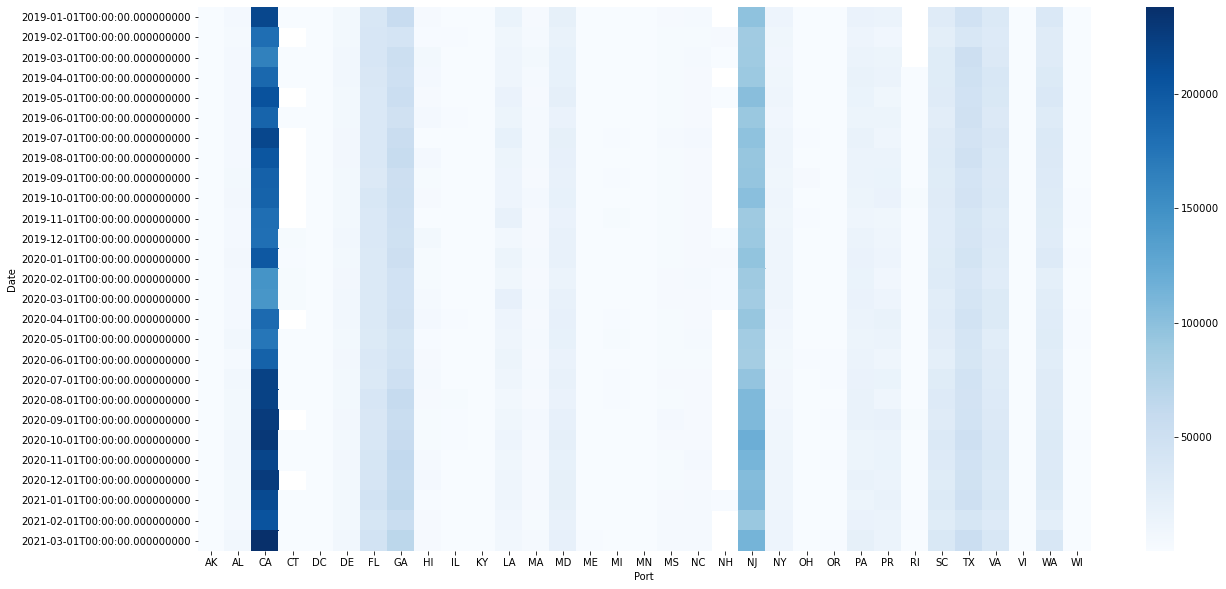

In [41]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(portTEUdf,cmap="Blues")
plt.show()

### Time Series International Trade: Monthly U.S. Imports by End-use Code <br>
The Census data API provides access to the most comprehensive set of data on current month and cumulative year-to-date imports using the End-use classification system. The End-use endpoint in the Census data API also provides value, shipping weight, and method of transportation totals at the district level for all U.S. trading partners.

In [42]:
useVar = pd.read_html('https://api.census.gov/data/timeseries/intltrade/imports/enduse/variables.html')[0]
useVar

,Name,Label,Concept,Required,Attributes,Limit,Predicate Type,Group,Unnamed: 8
0,AIR_CHA_MO,15-digit Air Charges,Measures,not required,NaN,0,int,NaN,NaN
1,AIR_CHA_YR,15-digit Year-to-date Air Charges,Measures,not required,NaN,0,int,NaN,NaN
2,AIR_VAL_MO,15-digit Air Value,Measures,not required,NaN,0,int,NaN,NaN
3,AIR_VAL_YR,15-digit Year-to-Date Air Value,Measures,not required,NaN,0,int,NaN,NaN
4,AIR_WGT_MO,15-digit Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
5,AIR_WGT_YR,15-digit Year-to-Date Air Shipping Weight,Measures,not required,NaN,0,int,NaN,NaN
6,CAL_DUT_MO,"15-digit Imports for Consumption, Calculated Duty",Measures,not required,NaN,0,int,NaN,NaN
7,CAL_DUT_YR,"15-digit Year-to-Date Imports for Consumption, Calculated Duty",Measures,not required,NaN,0,int,NaN,NaN
8,CC_MO,15-digit Card Count,Measures,not required,NaN,0,int,NaN,NaN
9,CC_YR,15-digit Year-to-Date Card Count,Measures,not required,NaN,0,int,NaN,NaN


In [43]:
useDict = dict(zip(useVar["Name"], useVar["Label"].str.replace('15-digit ', '')))

In [44]:
useURL = 'https://api.census.gov/data/timeseries/intltrade/imports/enduse?get='
useURLreq = requests.get(f"{useURL}I_ENDUSE,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_WGT_MO,CON_VAL_MO,CC_MO&time=from+2019+to+2021&key={key}")
print(useURLreq.url)

https://api.census.gov/data/timeseries/intltrade/imports/enduse?get=I_ENDUSE,I_ENDUSE_SDESC,DISTRICT,DIST_NAME,CNT_WGT_MO,CON_VAL_MO,CC_MO&time=from+2019+to+2021&key=c140aee8a215a9f809ef67c3c758614e79362587


In [45]:
useData = useURLreq.json()
useDF = pd.DataFrame(useData, columns=useData[0]).drop([0]).rename(columns=useDict)
pd.set_option('display.max_colwidth', None)
useDF

,1- or 5-character Import ENDUSE Code,100-character Import ENDUSE Short Description,2-character District Code,50-character District name,Containerized Vessel Shipping Weight,"Imports for Consumption, Total Value",Card Count,ISO-8601 Date/Time value
1,00110,DAIRY PRODUCTS AND EGGS,-,TOTAL FOR ALL DISTRICTS,27855468,154007917,4566,2019-01
2,0,"FOODS, FEEDS, AND BEVERAGES",-,TOTAL FOR ALL DISTRICTS,3210564497,12644009005,523308,2019-01
3,00000,GREEN COFFEE,-,TOTAL FOR ALL DISTRICTS,133696955,389845724,4346,2019-01
4,00010,COCOA BEANS,-,TOTAL FOR ALL DISTRICTS,30900280,108660535,312,2019-01
5,00020,CANE AND BEET SUGAR,-,TOTAL FOR ALL DISTRICTS,41121466,146421769,1688,2019-01
...,...,...,...,...,...,...,...,...
152785,16110,"BLANK TAPES, AUDIO & VISUAL",11,"PHILADELPHIA, PA",0,0,0,2021-03
152786,16110,"BLANK TAPES, AUDIO & VISUAL",15,"WILMINGTON, NC",647,23654,2,2021-03
152787,16110,"BLANK TAPES, AUDIO & VISUAL",16,"CHARLESTON, SC",381590,1951671,193,2021-03
152788,16110,"BLANK TAPES, AUDIO & VISUAL",17,"SAVANNAH, GA",21556,1172337,9,2021-03


In [50]:
useDF = useDF.rename(columns={'1- or 5-character Import ENDUSE Code':'code',"Containerized Vessel Shipping Weight":"Weight","Imports for Consumption, Total Value":"Value","ISO-8601 Date/Time value":"Date","100-character Import ENDUSE Short Description":"ENDUSE", '50-character District name': 'District'})
useDF['Date'] = pd.to_datetime(useDF['Date'])
useDF

,code,ENDUSE,2-character District Code,District,Weight,Value,Card Count,Date
1,00110,DAIRY PRODUCTS AND EGGS,-,TOTAL FOR ALL DISTRICTS,27855468,154007917,4566,2019-01-01
2,0,"FOODS, FEEDS, AND BEVERAGES",-,TOTAL FOR ALL DISTRICTS,3210564497,12644009005,523308,2019-01-01
3,00000,GREEN COFFEE,-,TOTAL FOR ALL DISTRICTS,133696955,389845724,4346,2019-01-01
4,00010,COCOA BEANS,-,TOTAL FOR ALL DISTRICTS,30900280,108660535,312,2019-01-01
5,00020,CANE AND BEET SUGAR,-,TOTAL FOR ALL DISTRICTS,41121466,146421769,1688,2019-01-01
...,...,...,...,...,...,...,...,...
152785,16110,"BLANK TAPES, AUDIO & VISUAL",11,"PHILADELPHIA, PA",0,0,0,2021-03-01
152786,16110,"BLANK TAPES, AUDIO & VISUAL",15,"WILMINGTON, NC",647,23654,2,2021-03-01
152787,16110,"BLANK TAPES, AUDIO & VISUAL",16,"CHARLESTON, SC",381590,1951671,193,2021-03-01
152788,16110,"BLANK TAPES, AUDIO & VISUAL",17,"SAVANNAH, GA",21556,1172337,9,2021-03-01


In [51]:
enduse = useDF[(useDF.code =='0')|(useDF.code =='1')|(useDF.code =='2')|(useDF.code =='3')|(useDF.code =='4')|(useDF.code =='5')]
endusedata = enduse[~enduse['District'].str.contains("TOTAL")].drop(columns=['2-character District Code', 'code'])
endusedata

,ENDUSE,District,Weight,Value,Card Count,Date
149,"FOODS, FEEDS, AND BEVERAGES","PORTLAND, ME",4353666,184410357,8291,2019-01-01
150,"FOODS, FEEDS, AND BEVERAGES","ST. ALBANS, VT",0,51891441,3059,2019-01-01
151,"FOODS, FEEDS, AND BEVERAGES","BOSTON, MA",18490619,109523527,3203,2019-01-01
152,"FOODS, FEEDS, AND BEVERAGES","PROVIDENCE, RI",0,2573902,3,2019-01-01
153,"FOODS, FEEDS, AND BEVERAGES","OGDENSBURG, NY",0,200684083,14298,2019-01-01
...,...,...,...,...,...,...
151056,INDUSTRIAL SUPPLIES AND MATERIALS,U.S. VIRGIN ISLANDS,75930,24108,5,2021-03-01
151057,INDUSTRIAL SUPPLIES AND MATERIALS,"MIAMI, FL",226925933,804164720,17104,2021-03-01
151058,INDUSTRIAL SUPPLIES AND MATERIALS,"HOUSTON-GALVESTON, TX",677433334,3074813127,40436,2021-03-01
151059,INDUSTRIAL SUPPLIES AND MATERIALS,"WASHINGTON, DC",556754,91257719,1993,2021-03-01


In [52]:
endusedata = endusedata.rename(columns={'Card Count': 'Item_Count'})

In [125]:
endusedata = endusedata[(endusedata.Item_Count != "0")]
endusedata

,Date,ENDUSE,District,Weight,Value,Item_Count
149,2019-01-01,"FOODS, FEEDS, AND BEVERAGES","PORTLAND, ME",4353666,184410357,8291
150,2019-01-01,"FOODS, FEEDS, AND BEVERAGES","ST. ALBANS, VT",0,51891441,3059
151,2019-01-01,"FOODS, FEEDS, AND BEVERAGES","BOSTON, MA",18490619,109523527,3203
152,2019-01-01,"FOODS, FEEDS, AND BEVERAGES","PROVIDENCE, RI",0,2573902,3
153,2019-01-01,"FOODS, FEEDS, AND BEVERAGES","OGDENSBURG, NY",0,200684083,14298
...,...,...,...,...,...,...
151056,2021-03-01,INDUSTRIAL SUPPLIES AND MATERIALS,U.S. VIRGIN ISLANDS,75930,24108,5
151057,2021-03-01,INDUSTRIAL SUPPLIES AND MATERIALS,"MIAMI, FL",226925933,804164720,17104
151058,2021-03-01,INDUSTRIAL SUPPLIES AND MATERIALS,"HOUSTON-GALVESTON, TX",677433334,3074813127,40436
151059,2021-03-01,INDUSTRIAL SUPPLIES AND MATERIALS,"WASHINGTON, DC",556754,91257719,1993


In [131]:
grendusedata = endusedata.pivot(index=["Date",'ENDUSE'], columns=['District'], values=['Weight','Value','Item_Count'])
grendusedata.head()

Weight  \
District                                           ANCHORAGE, AK   
Date       ENDUSE                                                  
2019-01-01 AUTOMOTIVE VEHICLES, PARTS, AND ENGINES       19114.0   
           CAPITAL GOODS, EXCEPT AUTOMOTIVE                  0.0   
           CONSUMER GOODS                                42059.0   
           FOODS, FEEDS, AND BEVERAGES                 1090172.0   
           INDUSTRIAL SUPPLIES AND MATERIALS           2286933.0   

                                                                              \
District                                           BALTIMORE, MD  BOSTON, MA   
Date       ENDUSE                                                              
2019-01-01 AUTOMOTIVE VEHICLES, PARTS, AND ENGINES    15942594.0   3340796.0   
           CAPITAL GOODS, EXCEPT AUTOMOTIVE           36474549.0   9537160.0   
           CONSUMER GOODS                             56644367.0  27496933.0   
           FOODS, FEEDS, AND BEVERAGES               100667211.0  18490619.0   
           INDUSTRIAL SUPPLIES AND MATERIALS         286643043.0  43797453.0   

                                                                               \
District                                           BUFFALO, NY CHARLESTON, SC   
Date       ENDUSE                                                               
2019-01-01 AUTOMOTIVE VEHICLES, PARTS, AND ENGINES    430134.0     71530313.0   
           CAPITAL GOODS, EXCEPT AUTOMOTIVE          1756035.0    111773093.0   
           CONSUMER GOODS                             911040.0    109779437.0   
           FOODS, FEEDS, AND BEVERAGES                227017.0     38911303.0   
           INDUSTRIAL SUPPLIES AND MATERIALS         2238372.0    327532132.0   

                                                                               \
District                                            CHICAGO, IL CLEVELAND, OH   
Date       ENDUSE                                                               
2019-01-01 AUTOMOTIVE VEHICLES, PARTS, AND ENGINES   61372929.0    52438712.0   
           CAPITAL GOODS, EXCEPT AUTOMOTIVE         126756238.0    63180769.0   
           CONSUMER GOODS                           172872806.0    97493942.0   
           FOODS, FEEDS, AND BEVERAGES               77285845.0    19561752.0   
           INDUSTRIAL SUPPLIES AND MATERIALS        229514643.0   156446016.0   

                                                                       \
District                                           COLUMBIA-SNAKE, OR   
Date       ENDUSE                                                       
2019-01-01 AUTOMOTIVE VEHICLES, PARTS, AND ENGINES          5189192.0   
           CAPITAL GOODS, EXCEPT AUTOMOTIVE                 6387050.0   
           CONSUMER GOODS                                   8347471.0   
           FOODS, FEEDS, AND BEVERAGES                      8427705.0   
           INDUSTRIAL SUPPLIES AND MATERIALS               33563453.0   

                                                                          \
District                                           DALLAS-FORT WORTH, TX   
Date       ENDUSE                                                          
2019-01-01 AUTOMOTIVE VEHICLES, PARTS, AND ENGINES            32029519.0   
           CAPITAL GOODS, EXCEPT AUTOMOTIVE                   45344364.0   
           CONSUMER GOODS                                    101164287.0   
           FOODS, FEEDS, AND BEVERAGES                         4916023.0   
           INDUSTRIAL SUPPLIES AND MATERIALS                  72545945.0   

                                                                ...  \
District                                           DETROIT, MI  ...   
Date       ENDUSE                                               ...   
2019-01-01 AUTOMOTIVE VEHICLES, PARTS, AND ENGINES  20995526.0  ...   
           CAPITAL GOODS, EXCEPT AUTOMOTIVE         14129392.0  ...   
           CONSUMER GOODS

In [60]:
grendusedata.to_json("./static/data/grendusedata.json", orient='index')

In [61]:
grendusedata.to_csv("./static/data/grendusedata.csv")

In [62]:
endusedata.set_index('ENDUSE').to_csv("./static/data/endusedata.csv")

In [79]:
endusedata.to_json("./static/data/endusedata.json", orient='split', date_format='iso')

In [80]:
endusedata.melt().to_json("./static/data/meltendusedata.json")

In [81]:
endusedata.melt().to_csv("./static/data/meltendusedata.csv")

In [49]:
def to_flare_json(df, filename):
    """Convert dataframe into nested JSON as in flare files used for D3.js"""
    flare = dict()
    d = {"name": "flare", "children": []}
    
    for index, row in df.iterrows():
        parent = row[0].strftime("%Y %B")
        ENDUSE = row[1]
        District = row[2]
        Weight = row[3]
        Value = row[4]
        Item_Count = row[5]

        # Make a list of keys
        key_list = []
        for item in d['children']:
            key_list.append(item['name'])

        #if 'parent' is NOT a key in flare.JSON, append it
        if not parent in key_list:
            d['children'].append({"name": parent, "children":[{"name": ENDUSE,"children":[{ "name": District, "children":[{"name": "Weight", "value": Weight},{"name": "Value", "value": Value},{"name":"Item_Count","value":Item_Count}]}]}]})
        # if parent IS a key in flare.json, add a new child to it
        else:
            d['children'][key_list.index(parent)]['children'].append({"name": ENDUSE, "children":[{"name": District, "children": [{"name": "Weight", "value": Weight},{"name": "Value", "value": Value},{"name":"Item_Count","value":Item_Count}]}]})
    flare = d
    # export the final result to a json file
    with open(filename +'.json', 'w') as outfile:
        json.dump(flare, outfile, indent=4)
    return ("Done")

In [50]:
filename = "./static/data/endusedata2"

In [51]:
to_flare_json(endusedata, filename)

NameError: name 'endusedata' is not defined

In [224]:
def to_flare2_json(df, filename):
    """Convert dataframe into nested JSON as in flare files used for D3.js"""
    flare = dict()
    d = {"name": "US Census Consumer Data", "children": []}
    
    for index, row in df.iterrows():
        parent = row[0]
        ENDUSE = row[1]
        District = row[2]
        value = row[3]


        # Make a list of keys
        key_list = []
        for item in d['children']:
            key_list.append(item['name'])

        #if 'parent' is NOT a key in flare.JSON, append it
        if not parent in key_list:
            d['children'].append({"name": parent, "children":[{"name": ENDUSE, "childen": [{"name": District}]}]})
        # if parent IS a key in flare.json, add a new child to it
        else:
            d['children'][key_list.index(parent)]['children'].append({"name": parent, "children":[{"name": children}]})
    flare = d
    # export the final result to a json file
    with open(filename +'.json', 'w') as outfile:
        json.dump(flare, outfile, indent=4)
    return ("Done")

In [89]:
filename = "./static/data/endusedatamelt"

In [364]:
to_flare2_json(endusedatamelt, filename)

'Done'

In [46]:
def to_flare_json(df, filename):
    """Convert dataframe into nested JSON as in flare files used for D3.js"""
    data1 = dict()

    d = {"name": "US Census Consumer Data", "children": []}
    
    for index, row in df.iterrows():
        date = row[0].strftime("%Y %B")
        ENDUSE = row[1]
        District = row[2]
        Weight = row[3]
        Value = row[4]
        Item_Count = row[5]

        key_list = []
        for item in d['children']:
            key_list.append(item['name'])
            
            d['children'].append({
             "name": "Weight", "children":[{
             "name": date, "children":[{
             "name": ENDUSE,"children":[{
             "name": District, "value": Weight}]}]}]})
            

    data1 = d
    # export the final result to a json file
    with open(filename +'.json', 'w') as outfile:
        json.dump(data1, outfile, indent=4)
    return ("Done")

In [47]:
filename = "./static/data/endusedata2"

In [48]:
to_flare_json(endusedata, filename)

NameError: name 'endusedata' is not defined

### Total Consumption by Date, Product and Value

In [117]:
enduseTOTAL = enduse[enduse['District'].str.contains("TOTAL")].drop(columns=['code','2-character District Code','Weight'])
enduseTOTAL = enduseTOTAL.drop(columns='District')
enduseTOTAL

,ENDUSE,Value,Card Count,Date
2,"FOODS, FEEDS, AND BEVERAGES",12644009005,523308,2019-01
19,INDUSTRIAL SUPPLIES AND MATERIALS,44950507635,1234962,2019-01
71,"CAPITAL GOODS, EXCEPT AUTOMOTIVE",54331936824,1793272,2019-01
104,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES",29685606011,1084642,2019-01
112,CONSUMER GOODS,56358827870,2865151,2019-01
...,...,...,...,...
150246,INDUSTRIAL SUPPLIES AND MATERIALS,51207023191,1476805,2021-03
150298,"CAPITAL GOODS, EXCEPT AUTOMOTIVE",64220503697,2122918,2021-03
150332,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES",32624755451,1209191,2021-03
150339,CONSUMER GOODS,62144896226,3258592,2021-03


In [118]:
useTCOL = enduseTOTAL.columns.drop(['ENDUSE',"Date"])
enduseTOTAL[useTCOL] = enduseTOTAL[useTCOL].apply(pd.to_numeric, errors='coerce')
enduseTOTAL.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 2 to 150370
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ENDUSE      162 non-null    object
 1   Value       162 non-null    int64 
 2   Card Count  162 non-null    int64 
 3   Date        162 non-null    object
dtypes: int64(2), object(2)
memory usage: 6.3+ KB


In [119]:
valuePD = enduseTOTAL.pivot(index="Date", columns='ENDUSE', values='Value')
valuePD

ENDUSE,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES","CAPITAL GOODS, EXCEPT AUTOMOTIVE",CONSUMER GOODS,"FOODS, FEEDS, AND BEVERAGES",INDUSTRIAL SUPPLIES AND MATERIALS,OTHER GOODS
Date,,,,,,
2019-01,29685606011,54331936824,56358827870,12644009005,44950507635,8965165729
2019-02,29158685430,49793775442,48344054105,11072165193,37769028496,8692249924
2019-03,33732910210,57161020388,50246512101,13294785046,44147909110,9718542268
2019-04,31431903601,55664491361,53232710594,13324195211,45536655454,9444819220
2019-05,33464007823,59129342809,55837927149,13374820973,48996953683,10070663660
2019-06,32278897256,57021182865,51560575131,12404315309,42739922548,10230502263
2019-07,31418806173,58926891588,59709090714,12705244373,47132722515,10218649065
2019-08,32469109677,57692763752,58728025609,12196919202,44747759322,9241848523
2019-09,30047678791,55788883962,57880611040,11826211792,40860301414,10492241553


In [120]:
valuePD.describe()

ENDUSE,"AUTOMOTIVE VEHICLES, PARTS, AND ENGINES","CAPITAL GOODS, EXCEPT AUTOMOTIVE",CONSUMER GOODS,"FOODS, FEEDS, AND BEVERAGES",INDUSTRIAL SUPPLIES AND MATERIALS,OTHER GOODS
count,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01,2.700000e+01
mean,2.867985e+10,5.522129e+10,5.468721e+10,1.277207e+10,4.192468e+10,9.417741e+09
std,5.880849e+09,4.198822e+09,6.405704e+09,7.750835e+08,3.793883e+09,1.098520e+09
min,9.559681e+09,4.668228e+10,4.219771e+10,1.107217e+10,3.623128e+10,7.126396e+09
25%,2.850170e+10,5.321105e+10,5.029170e+10,1.239474e+10,3.878408e+10,8.830458e+09
50%,2.995237e+10,5.578888e+10,5.583793e+10,1.271863e+10,4.200831e+10,9.444819e+09
75%,3.222435e+10,5.748247e+10,5.899970e+10,1.323970e+10,4.418107e+10,9.982737e+09
max,3.407224e+10,6.422050e+10,6.625266e+10,1.518709e+10,5.120702e+10,1.194450e+10


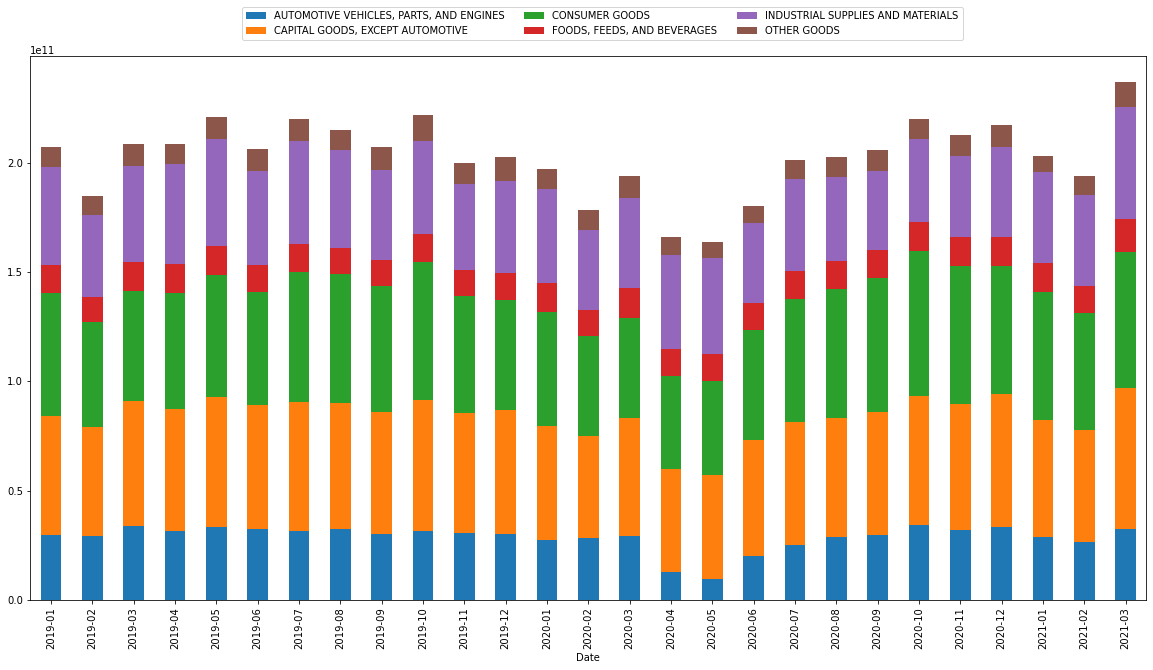

In [121]:
valuePD.plot(kind='bar', stacked=True, figsize=(20,10))
plt.legend(bbox_to_anchor =(0.84,1.1), ncol = 3)
plt.show()

In [122]:
valuePD.to_csv("./static/data/valuePD.csv")

In [123]:
valuePD.to_json("./static/data/valuePD.json")

In [506]:
svgdf = pd.read_csv('./static/images/world.svg', names=['path', 'd', 'id','name'], 
                     sep='" "', engine='python')

In [507]:
svgdf

,path,d,id,name
0,"<path d=""M1383 261.6l1.5 1.8-2.9 0.8-2.4 1.1-5.9 0.8-5.3 1.3-2.4 2.8 1.9 2.7 1.4 3.2-2 2.7 0.8 2.5-0.9 2.3-5.2-0.2 3.1 4.2-3.1 1.7-1.4 3.8 1.1 3.9-1.8 1.8-2.1-0.6-4 0.9-0.2 1.7-4.1 0-2.3 3.7 0.8 5.4-6.6 2.7-3.9-0.6-0.9 1.4-3.4-0.8-5.3 1-9.6-3.3 3.9-5.8-1.1-4.1-4.3-1.1-1.2-4.1-2.7-5.1 1.6-3.5-2.5-1 0.5-4.7 0.6-8 5.9 2.5 3.9-0.9 0.4-2.9 4-0.9 2.6-2-0.2-5.1 4.2-1.3 0.3-2.2 2.9 1.7 1.6 0.2 3 0 4.3 1.4 1.8 0.7 3.4-2 2.1 1.2 0.9-2.9 3.2 0.1 0.6-0.9-0.2-2.6 1.7-2.2 3.3 1.4-0.1 2 1.7 0.3 0.9 5.4 2.7 2.1 1.5-1.4 2.2-0.6 2.5-2.9 3.8 0.5 5.4 0z"" id=""AF"" name=""Afghanistan""></path>",NaN,NaN,NaN
1,"<path class=""Angola"" d=""M 1121.2 572 1121.8 574 1121.1 577.1 1122 580.1 1121.1 582.5 1121.5 584.7 1109.8 584.6 1109 605.1 1112.6 610.3 1116.2 614.3 1105.8 616.9 1092.3 616 1088.5 613 1065.8 613.2 1065 613.7 1061.7 610.8 1058.1 610.6 1054.7 611.7 1052 612.9 1051.5 608.9 1052.4 603.2 1054.4 597.3 1054.7 594.6 1056.6 588.8 1058 586.2 1061.3 582 1063.2 579.1 1063.8 574.4 1063.5 570.7 1061.9 568.4 1060.4 564.5 1059.1 560.7 1059.4 559.3 1061.1 556.8 1059.5 550.6 1058.3 546.3 1055.5 542.2 1056.1 541 1058.4 540.1 1060.1 540.2 1062.1 539.5 1078.8 539.6 1080.1 544.3 1081.7 548.2 1083 550.3 1085.1 553.6 1088.9 553.1 1090.7 552.2 1093.8 553.1 1094.7 551.5 1096.2 547.8 1099.7 547.5 1100 546.4 1102.9 546.4 1102.4 548.7 1109.2 548.6 1109.3 552.7 1110.4 555.1 1109.5 559 1109.9 563 1111.7 565.4 1111.3 573 1112.7 572.4 1115.1 572.6 1118.6 571.6 1121.2 572 Z"">",NaN,NaN,NaN
2,</path>,NaN,NaN,NaN
3,"<path class=""Angola"" d=""M 1055.3 539 1053.8 534.2 1056.1 531.4 1057.8 530.3 1059.9 532.5 1057.9 533.9 1056.9 535.5 1056.7 538.3 1055.3 539 Z"">",NaN,NaN,NaN
4,</path>,NaN,NaN,NaN
...,...,...,...,...
941,"<circle cx=""673.5"" cy=""724.1"" id=""1"">",NaN,NaN,NaN
942,</circle>,NaN,NaN,NaN
943,"<circle cx=""1798.2"" cy=""719.3"" id=""2"">",NaN,NaN,NaN
944,</circle>,NaN,NaN,NaN
